In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'META', 
           'TSLA', 'JPM', 'WMT', 'BAC', 'NFLX']
# Download adjusted close price data for each ticker
data = pd.DataFrame()
for t in tickers:
    data[t] = yf.download(t, start='2016-1-1')['Adj Close']

/Users/georgespyros/anaconda3/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
/Users/georgespyros/anaconda3/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
/Users/georgespyros/anaconda3/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[***

In [2]:
# Calculate log returns for each stock
log_returns = np.log(data / data.shift(1))

In [3]:
# Get the number of assets
num_assets = len(tickers)

# Number of random portfolios to simulate
num_portfolios = 10000

# Arrays to store portfolio returns and volatilities
pf_returns = np.zeros(num_portfolios)
pf_volatilities = np.zeros(num_portfolios)

for i in range(num_portfolios):
    # Generate random weights and normalize them
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    
    # Calculate portfolio returns and volatilities
    pf_returns[i] = np.sum(weights * log_returns.mean()) * 252
    pf_volatilities[i] = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights)))

In [4]:
# Create a DataFrame to store portfolio returns and volatilities
portfolios = pd.DataFrame({'Return': pf_returns, 'Volatility': pf_volatilities})

In [5]:
# Calculate Sharpe ratio for each portfolio
risk_free_rate = 0.03  # Assuming a risk-free rate of 3%
portfolios['Sharpe Ratio'] = (portfolios['Return'] - risk_free_rate) / portfolios['Volatility']

# Find the portfolio with the highest Sharpe ratio
optimal_portfolio = portfolios.loc[portfolios['Sharpe Ratio'].idxmax()]

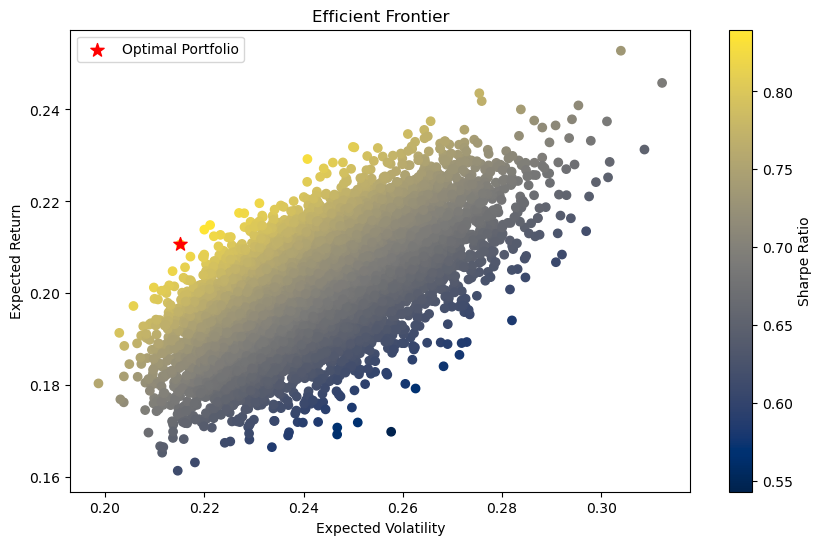

Optimal Portfolio:
Return          0.210679
Volatility      0.215191
Sharpe Ratio    0.839618
Name: 7124, dtype: float64


In [11]:
# Plot the efficient frontier
plt.figure(figsize=(10, 6))
plt.scatter(portfolios['Volatility'], portfolios['Return'], c=portfolios['Sharpe Ratio'], cmap='cividis')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(optimal_portfolio['Volatility'], optimal_portfolio['Return'], color='red', marker='*', s=100, label='Optimal Portfolio')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')
plt.legend()
plt.show()

print("Optimal Portfolio:")
print(optimal_portfolio)